# Assignment 2
## MACS 40400
## Kaylah Thomas

1. Why are some cultural cuisines more accommodating to dietary restrictions than others? My research question aims to map the accessibility of plant-based/alternative diets within different cultures in the US. Many races and ethnicities have brought rich culture and cuisine to the U.S. that stays true to the country from which it originated. With the growing popularity of alternative diets like veganism and vegetarianism, some cultures are naturally adept at providing accommodations for these restrictions, while other cultures do not have as accessible or common accommodations for those with alternative diets. The goal of this research question is to assess the availability of dishes that meet alternative diet requirements across different cultures, and then to examine why there may be more accommodation from some cultures rather than others.

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
import re
import numpy as np
import foodmod

2. The digital data that is being used to answer this research question is restaurant menu information scraped from allmenus.com. I am choosing to survey the New York City area for this analysis because this area has a considerable amount of diversity, which could create a better representative example of different cuisines.

In [4]:
cuisine_lst = ['soul-food', 'latin-american', 'american', 'caribbean', 'chinese']
menu_df = foodmod.scrape_top_menus(cuisine_lst, 'https://www.allmenus.com/ny/new-york/-/',
                               n=20)
menu_df.to_json('cultural_menus.json')

In [5]:
menus = pd.read_json('cultural_menus.json')
menus.head()

,Cuisine,Restaurant,Coordinates,Menu Items,Item Descriptions,URL
0,soul-food,SpaHa Soul,"[40.796320, -73.934772]","[Fresh Seasonal Drink, House Salad, Chicken Ba...",[Please call restaurant for today&# ;s selecti...,https://www.allmenus.com/ny/new-york/374424-sp...
1,soul-food,Harp Raw Bar &amp; Grill,"[40.752866, -73.972571]","[New England Clam Chowder Soup, New England Cl...","[, add a sourdough bread bowl, with garnishes ...",https://www.allmenus.com/ny/new-york/476845-ha...
2,soul-food,Genuine Roadside,"[40.762337, -73.996758]",[Buttermilk Chicken &amp;amp; Egg Biscuit sand...,"[Egg, cheddar cheese, Charred Jalapeno Mayo...",https://www.allmenus.com/ny/new-york/379748-ge...
4,soul-food,Jacob&#39;s Restaurant,"[40.810319, -73.944013]","[Cold Slaw, Mozzarella And Tomatoes, Pasta Sal...","[, , , , , , , , , , , with mixed fruit, , wit...",https://www.allmenus.com/ny/new-york/355541-ja...
5,soul-food,Double Wide Bar &amp; Southern Kitchen,"[40.729046, -73.980836]","[Biscuits and Gravy, 2 Breakfast Tacos, Egg Sa...","[Cheddar biscuit, sage sausage gravy topped wi...",https://www.allmenus.com/ny/new-york/358380-do...


In [6]:
# Combining each Menu Item with its Description
menus['Items and Descriptions'] = ''
for men_index, menu in menus.iterrows():
    items_and_desc = []
    for index, items in enumerate(menu['Menu Items']):
        item_and_desc_text = str(menu['Menu Items'][index]) + str(menu['Item Descriptions'][index])
        items_and_desc.append(item_and_desc_text)
    menus.at[men_index, 'Items and Descriptions'] = items_and_desc
menus.head()

,Cuisine,Restaurant,Coordinates,Menu Items,Item Descriptions,URL,Items and Descriptions
0,soul-food,SpaHa Soul,"[40.796320, -73.934772]","[Fresh Seasonal Drink, House Salad, Chicken Ba...",[Please call restaurant for today&# ;s selecti...,https://www.allmenus.com/ny/new-york/374424-sp...,[Fresh Seasonal DrinkPlease call restaurant fo...
1,soul-food,Harp Raw Bar &amp; Grill,"[40.752866, -73.972571]","[New England Clam Chowder Soup, New England Cl...","[, add a sourdough bread bowl, with garnishes ...",https://www.allmenus.com/ny/new-york/476845-ha...,"[New England Clam Chowder Soup, New England Cl..."
2,soul-food,Genuine Roadside,"[40.762337, -73.996758]",[Buttermilk Chicken &amp;amp; Egg Biscuit sand...,"[Egg, cheddar cheese, Charred Jalapeno Mayo...",https://www.allmenus.com/ny/new-york/379748-ge...,[Buttermilk Chicken &amp;amp; Egg Biscuit sand...
4,soul-food,Jacob&#39;s Restaurant,"[40.810319, -73.944013]","[Cold Slaw, Mozzarella And Tomatoes, Pasta Sal...","[, , , , , , , , , , , with mixed fruit, , wit...",https://www.allmenus.com/ny/new-york/355541-ja...,"[Cold Slaw, Mozzarella And Tomatoes, Pasta Sal..."
5,soul-food,Double Wide Bar &amp; Southern Kitchen,"[40.729046, -73.980836]","[Biscuits and Gravy, 2 Breakfast Tacos, Egg Sa...","[Cheddar biscuit, sage sausage gravy topped wi...",https://www.allmenus.com/ny/new-york/358380-do...,"[Biscuits and GravyCheddar biscuit, sage sausa..."


In [7]:
#creating word index to search for plant based options

diet_regex = 'veggie|vegan|vegetarian|plant based|plant-based|impossible burger|beyond burger|beyond meat|setian|tempeh'
menus['Plant Based Alternative'] = ''
for index, row in menus.iterrows():
    word_freq = 0
    for item in row['Items and Descriptions']:
        if re.search(diet_regex, item, re.I):
            word_freq += 1
    row['Plant Based Alternative'] = word_freq
menus['Plant Based Alternative'] = menus['Plant Based Alternative'].astype(int)
menus.head()

,Cuisine,Restaurant,Coordinates,Menu Items,Item Descriptions,URL,Items and Descriptions,Plant Based Alternative
0,soul-food,SpaHa Soul,"[40.796320, -73.934772]","[Fresh Seasonal Drink, House Salad, Chicken Ba...",[Please call restaurant for today&# ;s selecti...,https://www.allmenus.com/ny/new-york/374424-sp...,[Fresh Seasonal DrinkPlease call restaurant fo...,6
1,soul-food,Harp Raw Bar &amp; Grill,"[40.752866, -73.972571]","[New England Clam Chowder Soup, New England Cl...","[, add a sourdough bread bowl, with garnishes ...",https://www.allmenus.com/ny/new-york/476845-ha...,"[New England Clam Chowder Soup, New England Cl...",0
2,soul-food,Genuine Roadside,"[40.762337, -73.996758]",[Buttermilk Chicken &amp;amp; Egg Biscuit sand...,"[Egg, cheddar cheese, Charred Jalapeno Mayo...",https://www.allmenus.com/ny/new-york/379748-ge...,[Buttermilk Chicken &amp;amp; Egg Biscuit sand...,1
4,soul-food,Jacob&#39;s Restaurant,"[40.810319, -73.944013]","[Cold Slaw, Mozzarella And Tomatoes, Pasta Sal...","[, , , , , , , , , , , with mixed fruit, , wit...",https://www.allmenus.com/ny/new-york/355541-ja...,"[Cold Slaw, Mozzarella And Tomatoes, Pasta Sal...",0
5,soul-food,Double Wide Bar &amp; Southern Kitchen,"[40.729046, -73.980836]","[Biscuits and Gravy, 2 Breakfast Tacos, Egg Sa...","[Cheddar biscuit, sage sausage gravy topped wi...",https://www.allmenus.com/ny/new-york/358380-do...,"[Biscuits and GravyCheddar biscuit, sage sausa...",1


,Cuisine,num_options,avg_options
0,soul-food,55,3.666667
1,latin-american,23,1.150000
2,american,27,1.588235
3,caribbean,24,1.200000
4,chinese,18,0.947368


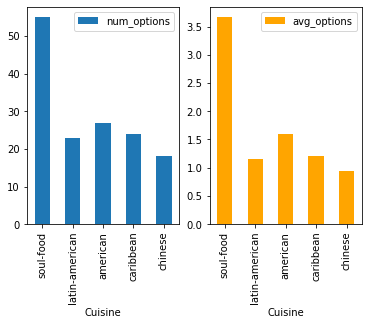

In [8]:
# Prepping to plot histogram for word freq
# grouping by cuisine
cuisine = pd.DataFrame({'Cuisine': cuisine_lst, 'num_options': 0, 'avg_options': 0})
cuisine_avg = menus.groupby('Cuisine').mean()
for cus_index, cus_row in cuisine.iterrows():
    for men_index, men_row in menus.iterrows():
        if men_row['Cuisine'] == cus_row['Cuisine']:
            cuisine.loc[cus_index,'num_options'] += men_row['Plant Based Alternative']
            
for cus_index, cus_row in cuisine.iterrows():
    for cus_avg_index, cus_avg_row in cuisine_avg.iterrows():
        if cus_row['Cuisine'] == cus_avg_index:
            cuisine.loc[cus_index, 'avg_options'] = cus_avg_row[0]
        else:
            continue

fig, axes = plt.subplots(nrows=1, ncols=2)
cuisine.plot(x = 'Cuisine', y = 'num_options', ax=axes[0], kind='bar')
cuisine.plot(x = 'Cuisine', y = 'avg_options', ax=axes[1], color = 'orange', kind='bar')
cuisine.head()

4. My preliminary analysis parses restaurants from five different ethnic cuisines in order to find alternative diet availability amongst different cultures. The cultures I decided to use for this analysis are: Soul Food, American, Latin American, Caribbean, and Chinese. I have created a small index in order to search for select words that indicate a dish does not contain any protein derived from animals. These terms serve as a preliminary way to determine the number of plant-based options amongst restaurants that serve a specific cultural cuisine. The legisign associated with the research question is the qualifiers that must be met in order to determine a food dish is plant-based. The object in this Sign is considered to be the actual food item. This object is conveyed by the sign-vehicle, which is represented by the item names and descriptions for each item on a menu. If the words from the menu items or description match any word from the index that I have created, then I am able to conclude that the object will be a replica of the legisign. The legisign is the set of laws or identifiers that consist of qualifications for a dish to be considered plant-based. 

    The plot created displays the number of plant-based dishes that are available for each cuisine, as well as the average amount of plant-based dishes offered at a given restaurant within each cuisine. The frequency of these replicas of the Legisign help in analyzing the extent to which plant-based alternatives are accessible in a given cultures cuisine. The average amount plant-based options for a given restaurant in each cuisine from this dataset can also shed insight to the accessibility of dishes in a more general sense. This preliminary analysis of five different cultures shows that the Soul Food category provides the most options. Discovering that Soul food has the highest number of plant-based options will prompt the exploration as to which factors contributed to this particular trend. 
    
    
    

5. After identifying any sort of pattern indicating that certain cultures have more accessibility to plant-based alternatives than others, the next steps will be to determine why this is the case. A literature review will be necessary to determine whether these trends may have to do with variables like socioeconomic status, food availability, religion, health, and other possible factors. An understanding of these factors may lend insight into why some cultures have more options than others.

    Additionally, making comparisons may be helpful in reaffirming findings about the availability of plant-based options within different cultural cuisines. Additional components to this research may include gathering a second dataset for a smaller city that may not have as many cultural options compared to New York City. This can provide some representation to other areas in the U.S. where plant-based alternatives may be even more scarce. Additional analyses can include determining semantic patterns within menu items from restaurants that are listed as exclusively vegan/vegetarian to help create a more reliable and comprehensive index of words that can then be used to find plant-based options within restaurants that serve other ethnic cuisines. I may also expand this idea to create indexes for Kosher or Halal diets to determine whether ethnic cuisines offer dishes that fit these alternative diets as well. 


In [14]:
menus.groupby('Cuisine').mean('Plant Based Altervative')

,Plant Based Alternative
Cuisine,
american,1.588235
caribbean,1.200000
chinese,0.947368
latin-american,1.150000
soul-food,3.666667


In [13]:
cuisine_avg

,Plant Based Alternative
Cuisine,
american,1.588235
caribbean,1.200000
chinese,0.947368
latin-american,1.150000
soul-food,3.666667
